# Part 1 - Time Series Analysis

## Table of Contents

1. [What is a Time Series?](#1)<br>
2. [How to import Time Series in Python?](#2)<br>
3. [What is panel data?](#3)<br>
4. [Visualizing a Time Series](#4)<br>
5. [Patterns in a Time Series](#5)<br>
6. [Additive and multiplicative Time Series](#6)<br>
7. [How to decompose a Time Series into its components?](#7)<br>

<a id="1"></a>
## 1. What is a Time Series?

**Time series is a sequence of observations recorded at regular time intervals.**
Depending on the frequency, a time series can be of yearly (ex: annual budget), quarterly (ex: expenses), monthly (ex: air traffic), weekly (ex: sales qty), daily (ex: weather), hourly (ex: stocks price), minutes (ex: inbound calls in a call canter) and even seconds wise (ex: web traffic).

**Why even analyze a time series?**
Because it is the preparatory step before you develop a forecast of the series.

**So what does analyzing a time series involve?**
Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

<a id="2"></a>
## 2.How to import Time Series in Python?

If the csv file already **have properly formated dates**, just `parse_dates=['col_name']`.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
print("current dtype of date column:", type(data['date'][0]))
data.head(1)

current dtype of date column: <class 'str'>


,date,value
0,1991-07-01,3.526591


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
print("\ncurrent dtype of date column:", type(data['date'][0]))
data = data.set_index('date')
data.head(1)


current dtype of date column: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,value
date,
1991-07-01,3.526591


If the csv file **does not have properly formated dates**, than import 'datetime', create suitable `convert_datetime` function and `parse_dates=['columns']` and `date_parser = convert_datetime`.

In [3]:
# if the csv file does not already have proper formated dates
data2 = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
data2.head(1)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling


In [4]:
from datetime import datetime
def convert_datetime(x):
    return datetime.strptime(x, '%Y %m %d %H')

data2 = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],\
                 date_parser = convert_datetime, keep_date_col = True)
data2 = data2.set_index('year_month_day_hour')
data2.head(2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling


<a id="3"></a>
## 3. What is panel data?

In point 2, **`df2` is a panel dataset** whereas `df1` is not. The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the Y, provided those columns will be available at the future forecasting period.

<a id="4"></a>
## 4. Visualizing a Time Series

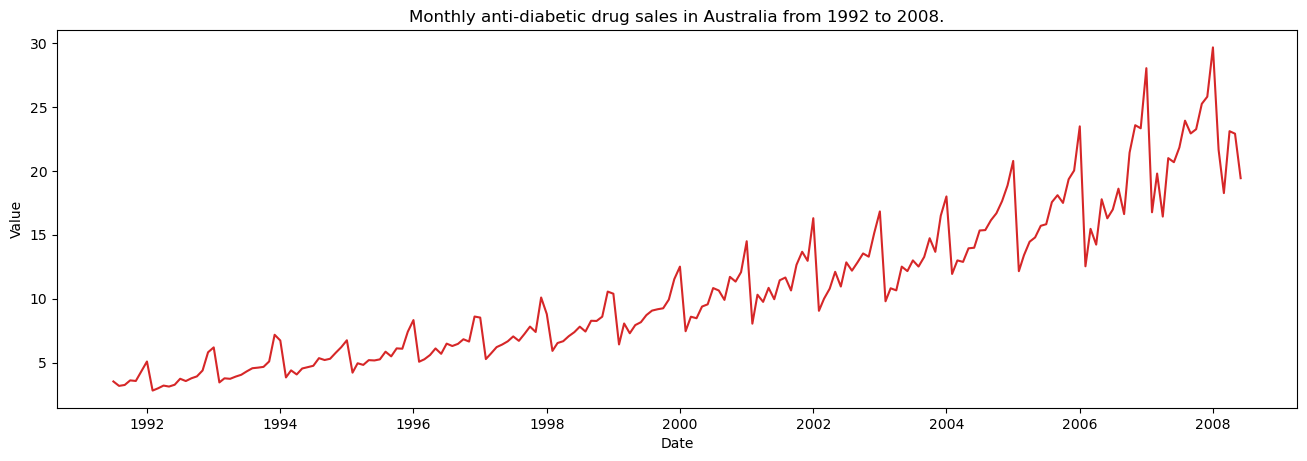

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')  

--> Since all values are positive, we can show this on both sides of the Y axis to emphasize the growth.

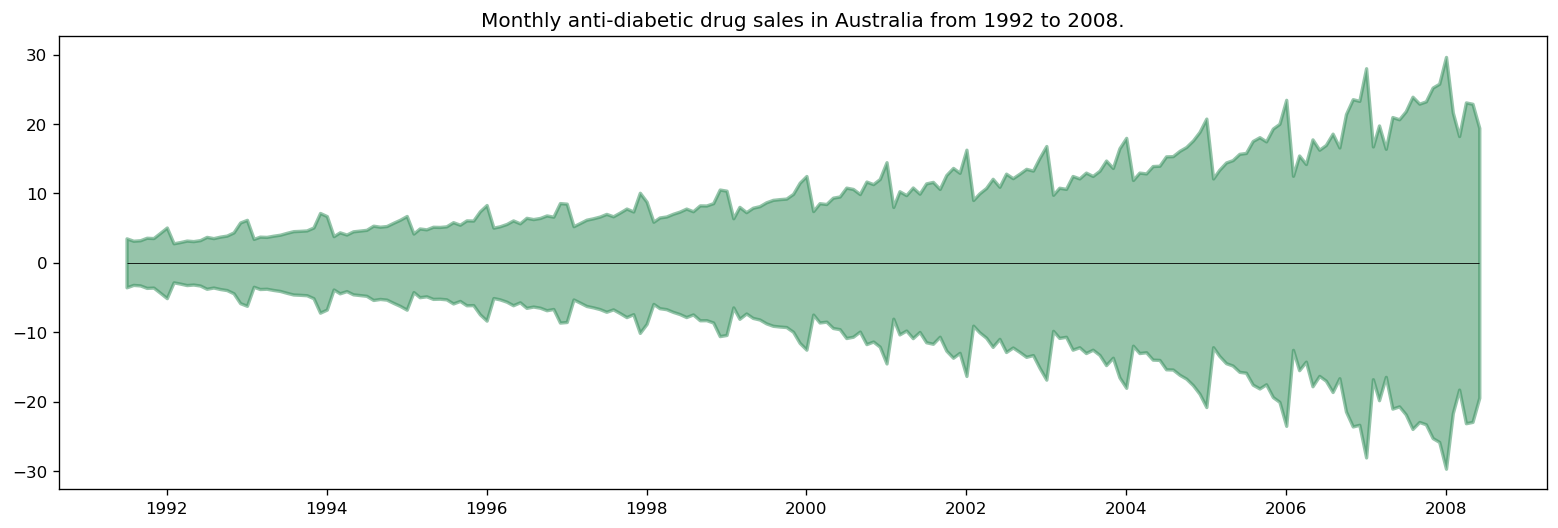

In [6]:
x = df.index
y1 = df.value

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

--> Since its a monthly time series and follows a certain repetitive pattern every year, we can plot each year as a separate line in the same plot. This enables comparing the year wise patterns side-by-side.

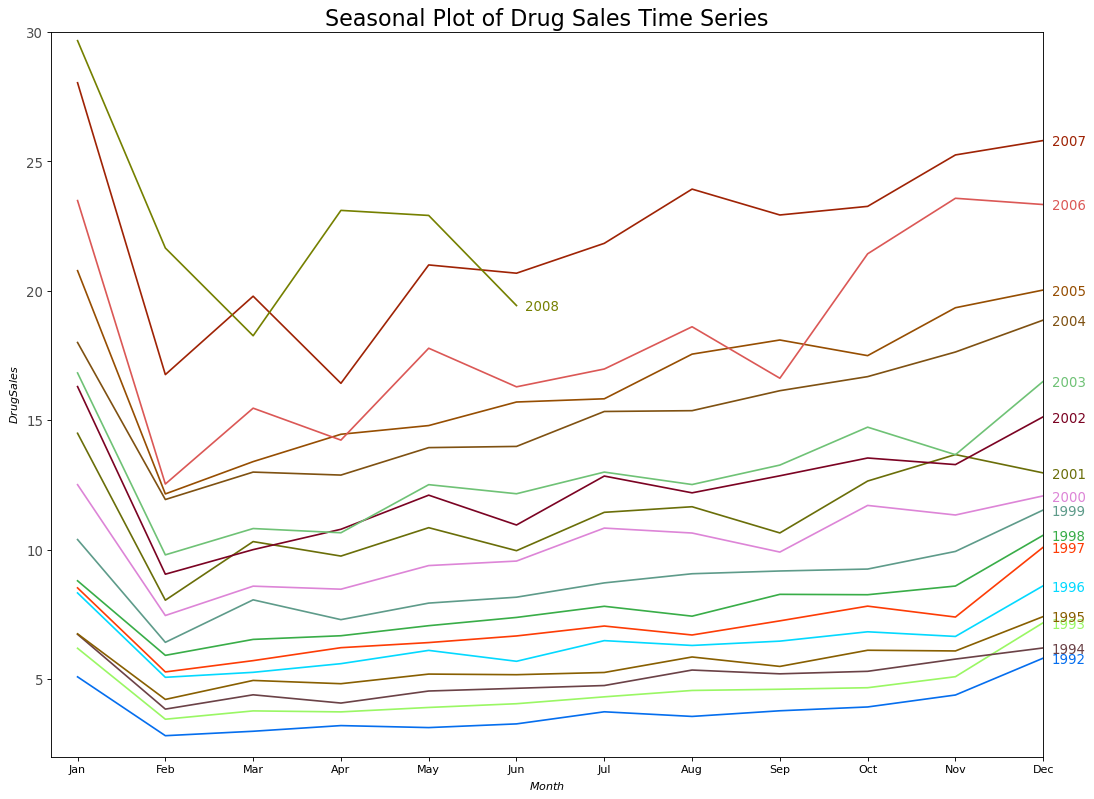

In [7]:
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(0)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0]-0.2, y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

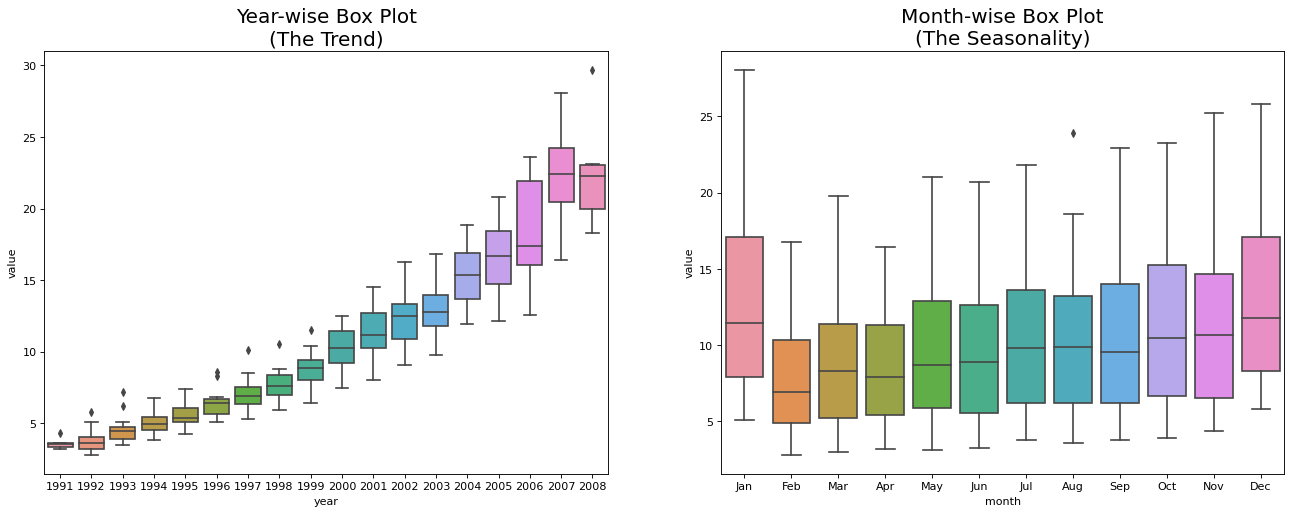

In [8]:
# Draw Plot
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

<a id="5"></a>
## 5. Patterns in a Time Series

Any time series may be split into the following components: **Base Level + Trend + Seasonality + Error**

A **trend** is observed when there is an increasing or decreasing slope observed in the time series.     
**Seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors.
**Cyclic** pattern is observed when the rise and fall pattern in the series does not happen in fixed calendar-based intervals.

**So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?**     
If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

<a id="6"></a>
## 6. Additive and multiplicative Time Series

Each observation in the series can be expressed as either a sum or a product of the components:

**Additive time series:** Value = Base Level + Trend + Seasonality + Error     
**Multiplicative Time Series:** Value = Base Level x Trend x Seasonality x Error

<a id="7"></a>
## 7. How to decompose a Time Series into its components?

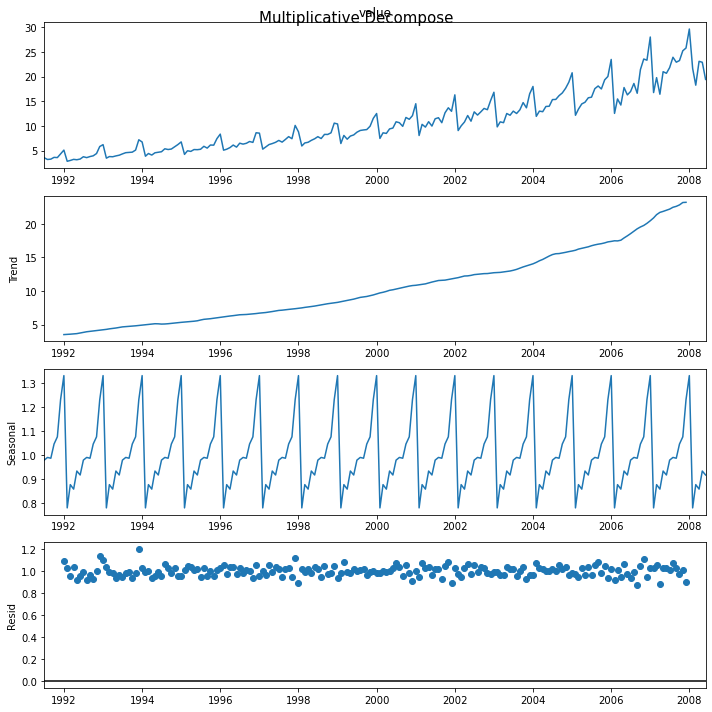

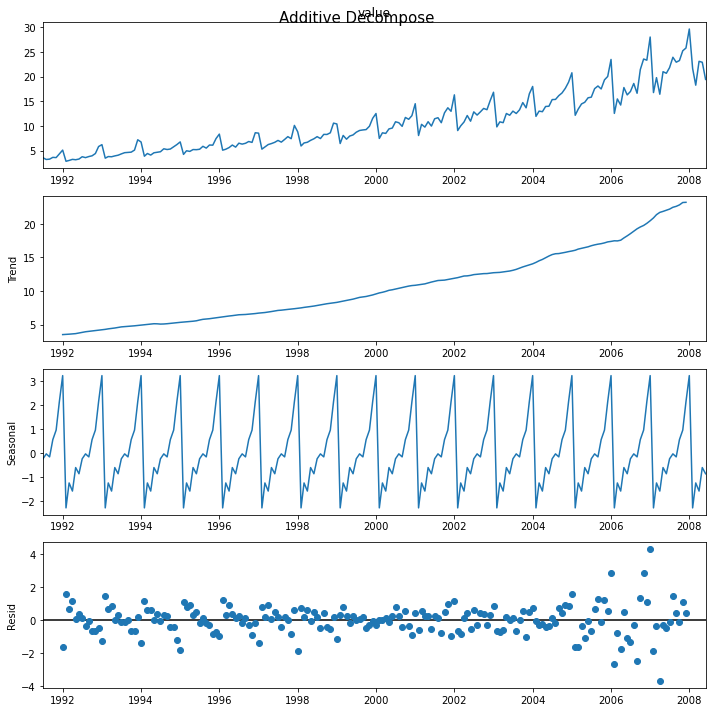

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_ = df.set_index('date')

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_['value'], model='multiplicative')

# Additive Decomposition
result_add = seasonal_decompose(df_['value'], model='additive')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
# fig, axes = plt.subplots(1,2, figsize=(8,8), dpi=100)
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)
plt.show()

If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe to check, the product of `seas`, `trend` and `resid` columns should exactly equal to the `actual_values`.

In [23]:
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed["mul_value"] = df_reconstructed['seas']*df_reconstructed['trend']*df_reconstructed['resid']
df_reconstructed[6:11]

,seas,trend,resid,actual_values,mul_value
date,,,,,
1992-01-01,1.330546,3.503344,1.091599,5.088335,5.088335
1992-02-01,0.779554,3.527891,1.023394,2.814520,2.814520
1992-03-01,0.876379,3.565511,0.955539,2.985811,2.985811
1992-04-01,0.857777,3.600447,1.037689,3.204780,3.204780
1992-05-01,0.933046,3.647703,0.918936,3.127578,3.127578


<a id="8"></a>
8. Stationary and non-stationary Time Series
9. How to make a Time Series stationary?
10. How to test for stationarity?
11. What is the difference between white noise and a stationary series?
12. How to detrend a Time Series?
13. How to deseasonalize a Time Series?
14. How to test for seasonality of a Time Series?
15. How to treat missing values in a Time Series?
16. What is autocorrelation and partial autocorrelation functions?
17. How to compute partial autocorrelation function?
18. Lag Plots
19. How to estimate the forecastability of a Time Series?
20. Why and How to smoothen a Time Series?
21. How to use Granger Causality test to know if one Time Series is helpful in forecasting another?
22. What Next